In [2]:
"""
Two fluid model
compressible
differential equation system
well-posedness analysis
"""

# Libraries
from IPython.display import clear_output
from math import pi
from matplotlib import (rc, style)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import (brenth, fsolve)
from scipy.linalg import eigvals, eig
from scipy.sparse.linalg import eigs
from scipy.interpolate import interp1d

import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import time

# General configuration for plots
%matplotlib inline
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 18
        }
matplotlib.rc('font',family = 'Times New Roman')


minj1            = 1e-2 # epstest
maxj1            = 5

minj2            = 1e-1 # epstest
maxj2            = 30

<function matplotlib.pyplot.show(*args, **kw)>

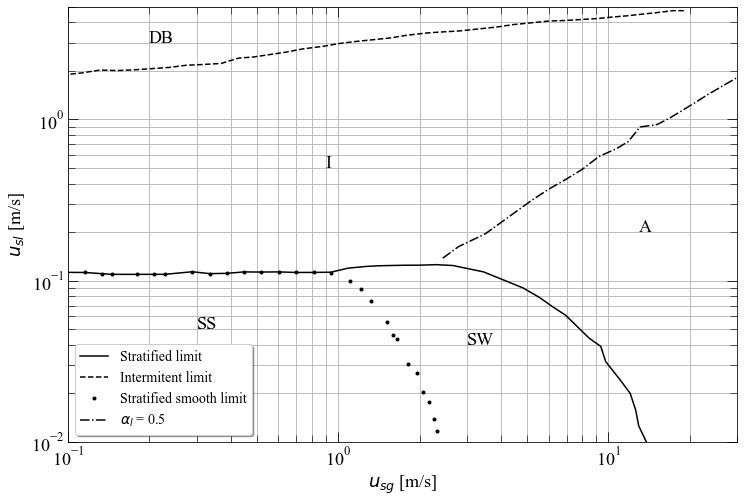

In [5]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# horizontal pipe d = 0.051

x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/vkh_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/intermittent_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/ss_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/alpha05_0deg.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.05, 'SS', size = 18) #fontdict = font
plt.text(3.0, 0.04, 'SW', size = 18)
plt.text(0.9, 0.5, 'I', size = 18)
plt.text(0.2, 3, 'DB', size = 18)
plt.text(13, 0.2, 'A', size = 18)


plt.savefig('barnea1981-1983maps_inclined/barnea1981_horizontal/barnea_horizontal.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

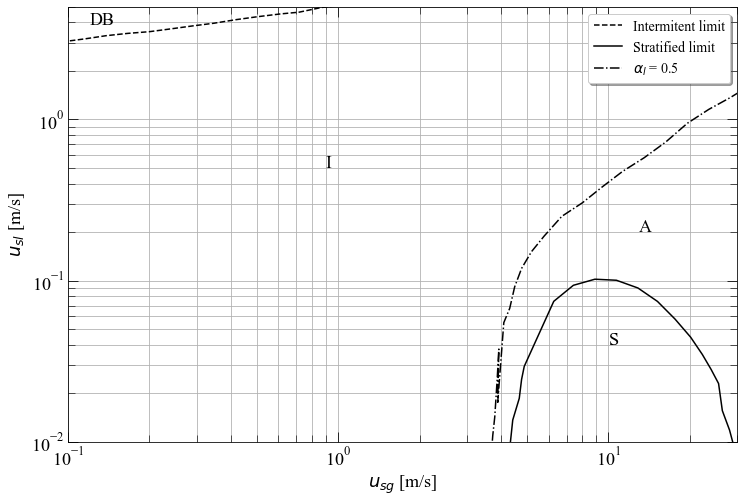

In [19]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# 0.25 deg inclined pipe d = 0.051

x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/intermittent_limit_025deg.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/ss_limit_025deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/alpha05_025deg.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k--', label = 'Intermitent limit')
ax.loglog(x2,y2, 'k-', label = 'Stratified limit')
ax.loglog(x3,y3, 'k-.', label = r'$\alpha_l$ = 0.5')
    
plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(10.0, 0.04, 'S', size = 18)
plt.text(0.9, 0.5, 'I', size = 18)
plt.text(0.12, 3.9, 'DB', size = 18)
plt.text(13, 0.2, 'A', size = 18)


plt.savefig('barnea1981-1983maps_inclined/barnea1983_025upward/barnea1983_025upward.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

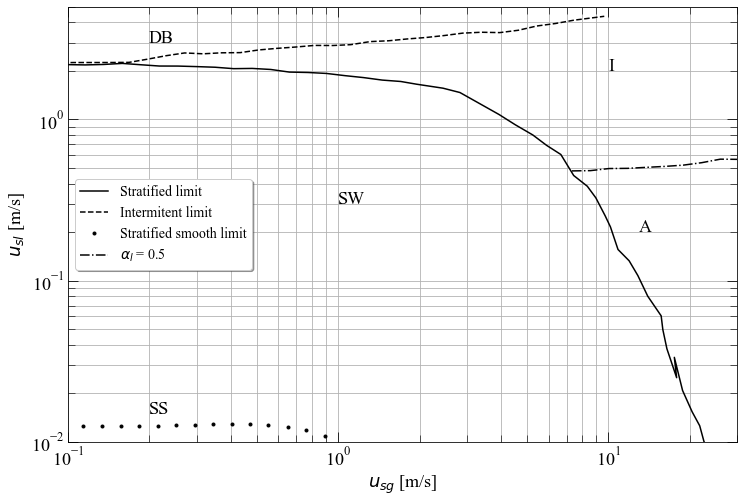

In [21]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# -5deg inclined pipe d = 0.051

x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/vkh_limit_-5deg.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/intermittent_limit_-5deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/ss_limit_-5deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/alpha05_-5deg.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.2, 0.015, 'SS', size = 18) #fontdict = font
plt.text(1.0, 0.3, 'SW', size = 18)
plt.text(10, 2, 'I', size = 18)
plt.text(0.2, 3, 'DB', size = 18)
plt.text(13, 0.2, 'A', size = 18)


plt.savefig('barnea1981-1983maps_inclined/barnea1981_5downward/barnea1981_5downward.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

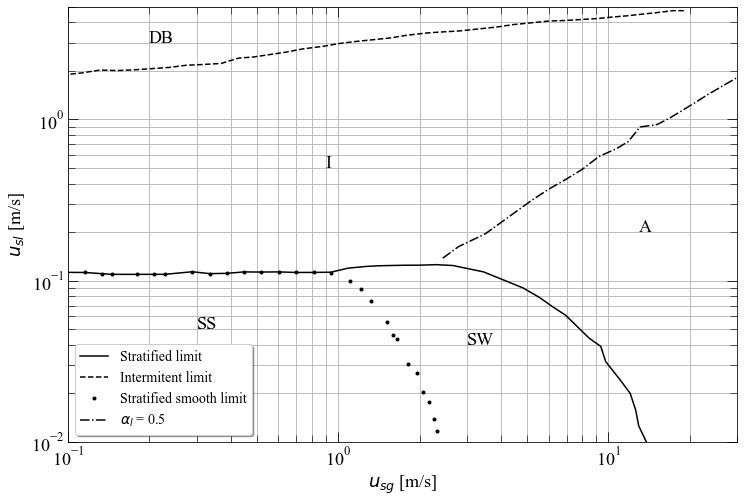

In [8]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# horizontal pipe d = 0.051

x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/vkh_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/intermittent_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/ss_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/alpha05_0deg.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.05, 'SS', size = 18) #fontdict = font
plt.text(3.0, 0.04, 'SW', size = 18)
plt.text(0.9, 0.5, 'I', size = 18)
plt.text(0.2, 3, 'DB', size = 18)
plt.text(13, 0.2, 'A', size = 18)


plt.savefig('barnea1981-1983maps_inclined/barnea1981_horizontal/barnea_horizontal.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

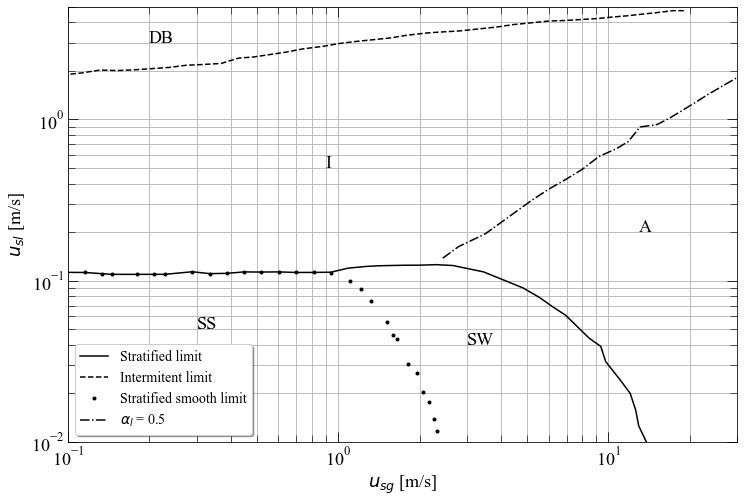

In [9]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# horizontal pipe d = 0.051

x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/vkh_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/intermittent_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/ss_limit_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/alpha05_0deg.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.05, 'SS', size = 18) #fontdict = font
plt.text(3.0, 0.04, 'SW', size = 18)
plt.text(0.9, 0.5, 'I', size = 18)
plt.text(0.2, 3, 'DB', size = 18)
plt.text(13, 0.2, 'A', size = 18)


plt.savefig('barnea1981-1983maps_inclined/barnea1981_horizontal/barnea_horizontal.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show